# **Adiciona caminho de src para permitir importações a este notebook**

In [14]:
import sys
from pathlib import Path

# Define o caminho base do projeto (um nível acima de /notebooks)
BASE_DIR = Path(__file__).resolve().parent.parent  if '__file__' in globals() else Path.cwd().parent

# Caminho para a pasta src/
SRC_DIR = BASE_DIR / "src"

# Adiciona SRC_DIR e BASE_DIR ao sys.path
sys.path.append(str(BASE_DIR))
sys.path.append(str(SRC_DIR))

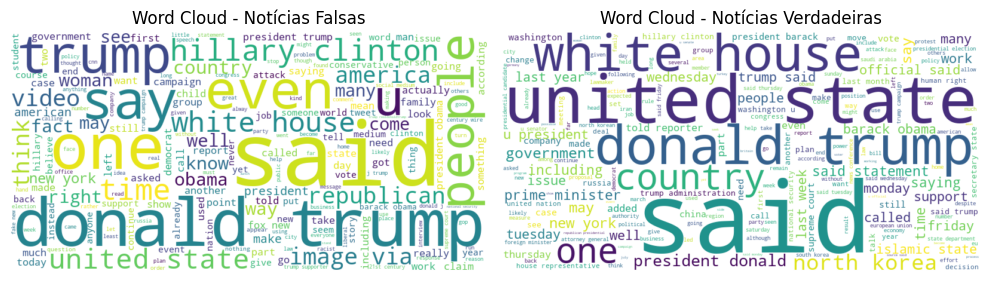

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import os
import pandas as pd

def gerar_wordcloud_por_sentimento(dados):

  # Separar notícias
  fake_news = dados[dados['label'] == 0]['full_text_clean'].astype(str).tolist()
  true_news = dados[dados['label'] == 1]['full_text_clean'].astype(str).tolist()

  # Criar Word Cloud para notícias verdadeiras
  texto_fake_news = ' '.join(fake_news)
  wordcloud_fake = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(texto_fake_news)

  # Criar Word Cloud para notícias falsas
  texto_true_news = ' '.join(true_news)
  wordcloud_true = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(texto_true_news)

  # Exibir as Word Clouds
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, gráfico 1
  plt.imshow(wordcloud_fake, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud - Notícias Falsas')

  plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, gráfico 2
  plt.imshow(wordcloud_true, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud - Notícias Verdadeiras')

  plt.tight_layout()  # Ajustar o layout para evitar sobreposição
  plt.show()

# Exemplo de uso:
processed_df = pd.read_csv(os.path.join(BASE_DIR, "data", "processed", "processed_dataset.csv"))
gerar_wordcloud_por_sentimento(processed_df)

# **Vetorização e definição dos dados de treino e teste do dataset**

In [19]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from src.vectorizer import create_vectorizer

# Carrega o dataset processado em formato .csv
processed_df = pd.read_csv(os.path.join(BASE_DIR, "data", "processed", "processed_dataset.csv"))

# Define as características (X) e o alvo (Y)
X = processed_df['full_text_clean']
Y = processed_df['label']

# Separa os dados de treino e teste (80% treino, 20% teste)
X_train_text, X_test_text, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Cria o vetor TF-IDF
vectorizer = create_vectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# **Treinamento e avaliação do modelo Logistic Regression (LR)**

In [20]:
from src.classifiers.logistic_regression import train_logistic_regression


# Treina e avalia o modelo Logistic Regression (LR)
train_logistic_regression(X_train, Y_train, X_test, Y_test)

Logistic Regression
Acurácia: 0.9803
Relatório de Classificação:
              precision    recall  f1-score   support

   Fake News       0.99      0.98      0.98      4695
   Real News       0.97      0.99      0.98      4283

    accuracy                           0.98      8978
   macro avg       0.98      0.98      0.98      8978
weighted avg       0.98      0.98      0.98      8978

Matriz de Confusão:
[[4578  117]
 [  60 4223]]


# **Treinamento e avaliação do modelo Random Forest (RF)**

In [ ]:
from src.classifiers.random_forest import train_random_forest

# Treina e avalia o modelo Random Forest (RF)
train_random_forest(X_train, Y_train, X_test, Y_test)

# **Treinamento e avaliação do modelo Naive Bayes (NB)**

In [5]:
from src.classifiers.naive_bayes import train_naive_bayes

# Treina e avalia o modelo Naive Bayes (NB)
train_naive_bayes(X_train, Y_train, X_test, Y_test)

Naive Bayes
Acurácia: 0.9393
Relatório de Classificação:
              precision    recall  f1-score   support

   Fake News       0.95      0.94      0.94      4695
   Real News       0.93      0.94      0.94      4283

    accuracy                           0.94      8978
   macro avg       0.94      0.94      0.94      8978
weighted avg       0.94      0.94      0.94      8978

Matriz de Confusão:
[[4397  298]
 [ 247 4036]]


# **Treinamento e avaliação do modelo Support Vector Machines (SVM)**

In [6]:
from src.classifiers.svm import train_svm

# Treina e avalia o modelo Support Vector Machines (SVM)
train_svm(X_train, Y_train, X_test, Y_test)

Support Vector Machines (SVM)
Acurácia: 0.9904
Relatório de Classificação:
              precision    recall  f1-score   support

   Fake News       0.99      0.99      0.99      4695
   Real News       0.99      0.99      0.99      4283

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978

Matriz de Confusão:
[[4642   53]
 [  33 4250]]
